# 影像圖片分類深度學習模型
快速使用現成模型分類圖片

## 大綱
0. 起始準備
1. 預備知識：圖像的預處理程序
2. 預備知識：中英文翻譯功能
3. 圖片數據`預處理`
1-2. 圖片`分類`預測
1-3. 使用`預訓練`模型

# 0. 起始準備 (連接雲端硬碟 Colab+Google Drive)

In [1]:
# 連接雲端硬碟，起始準備

from google.colab import drive
drive.mount('/content/drive')

# 移到資料夾
%cd /content/drive/MyDrive/class_AI/model_images/
!pwd
!ls

Mounted at /content/drive
/content/drive/MyDrive/class_AI/model_images
/content/drive/MyDrive/class_AI/model_images
1_mobilenet_predict.ipynb  bird_02.jpg	car_02.jpg  cat_02.jpg	dog_01.jpg
bird_01.jpg		   car_01.jpg	cat_01.jpg  cat_03.jpg	snake_01.jpg


# 1. 預備知識：圖像的預處理程序

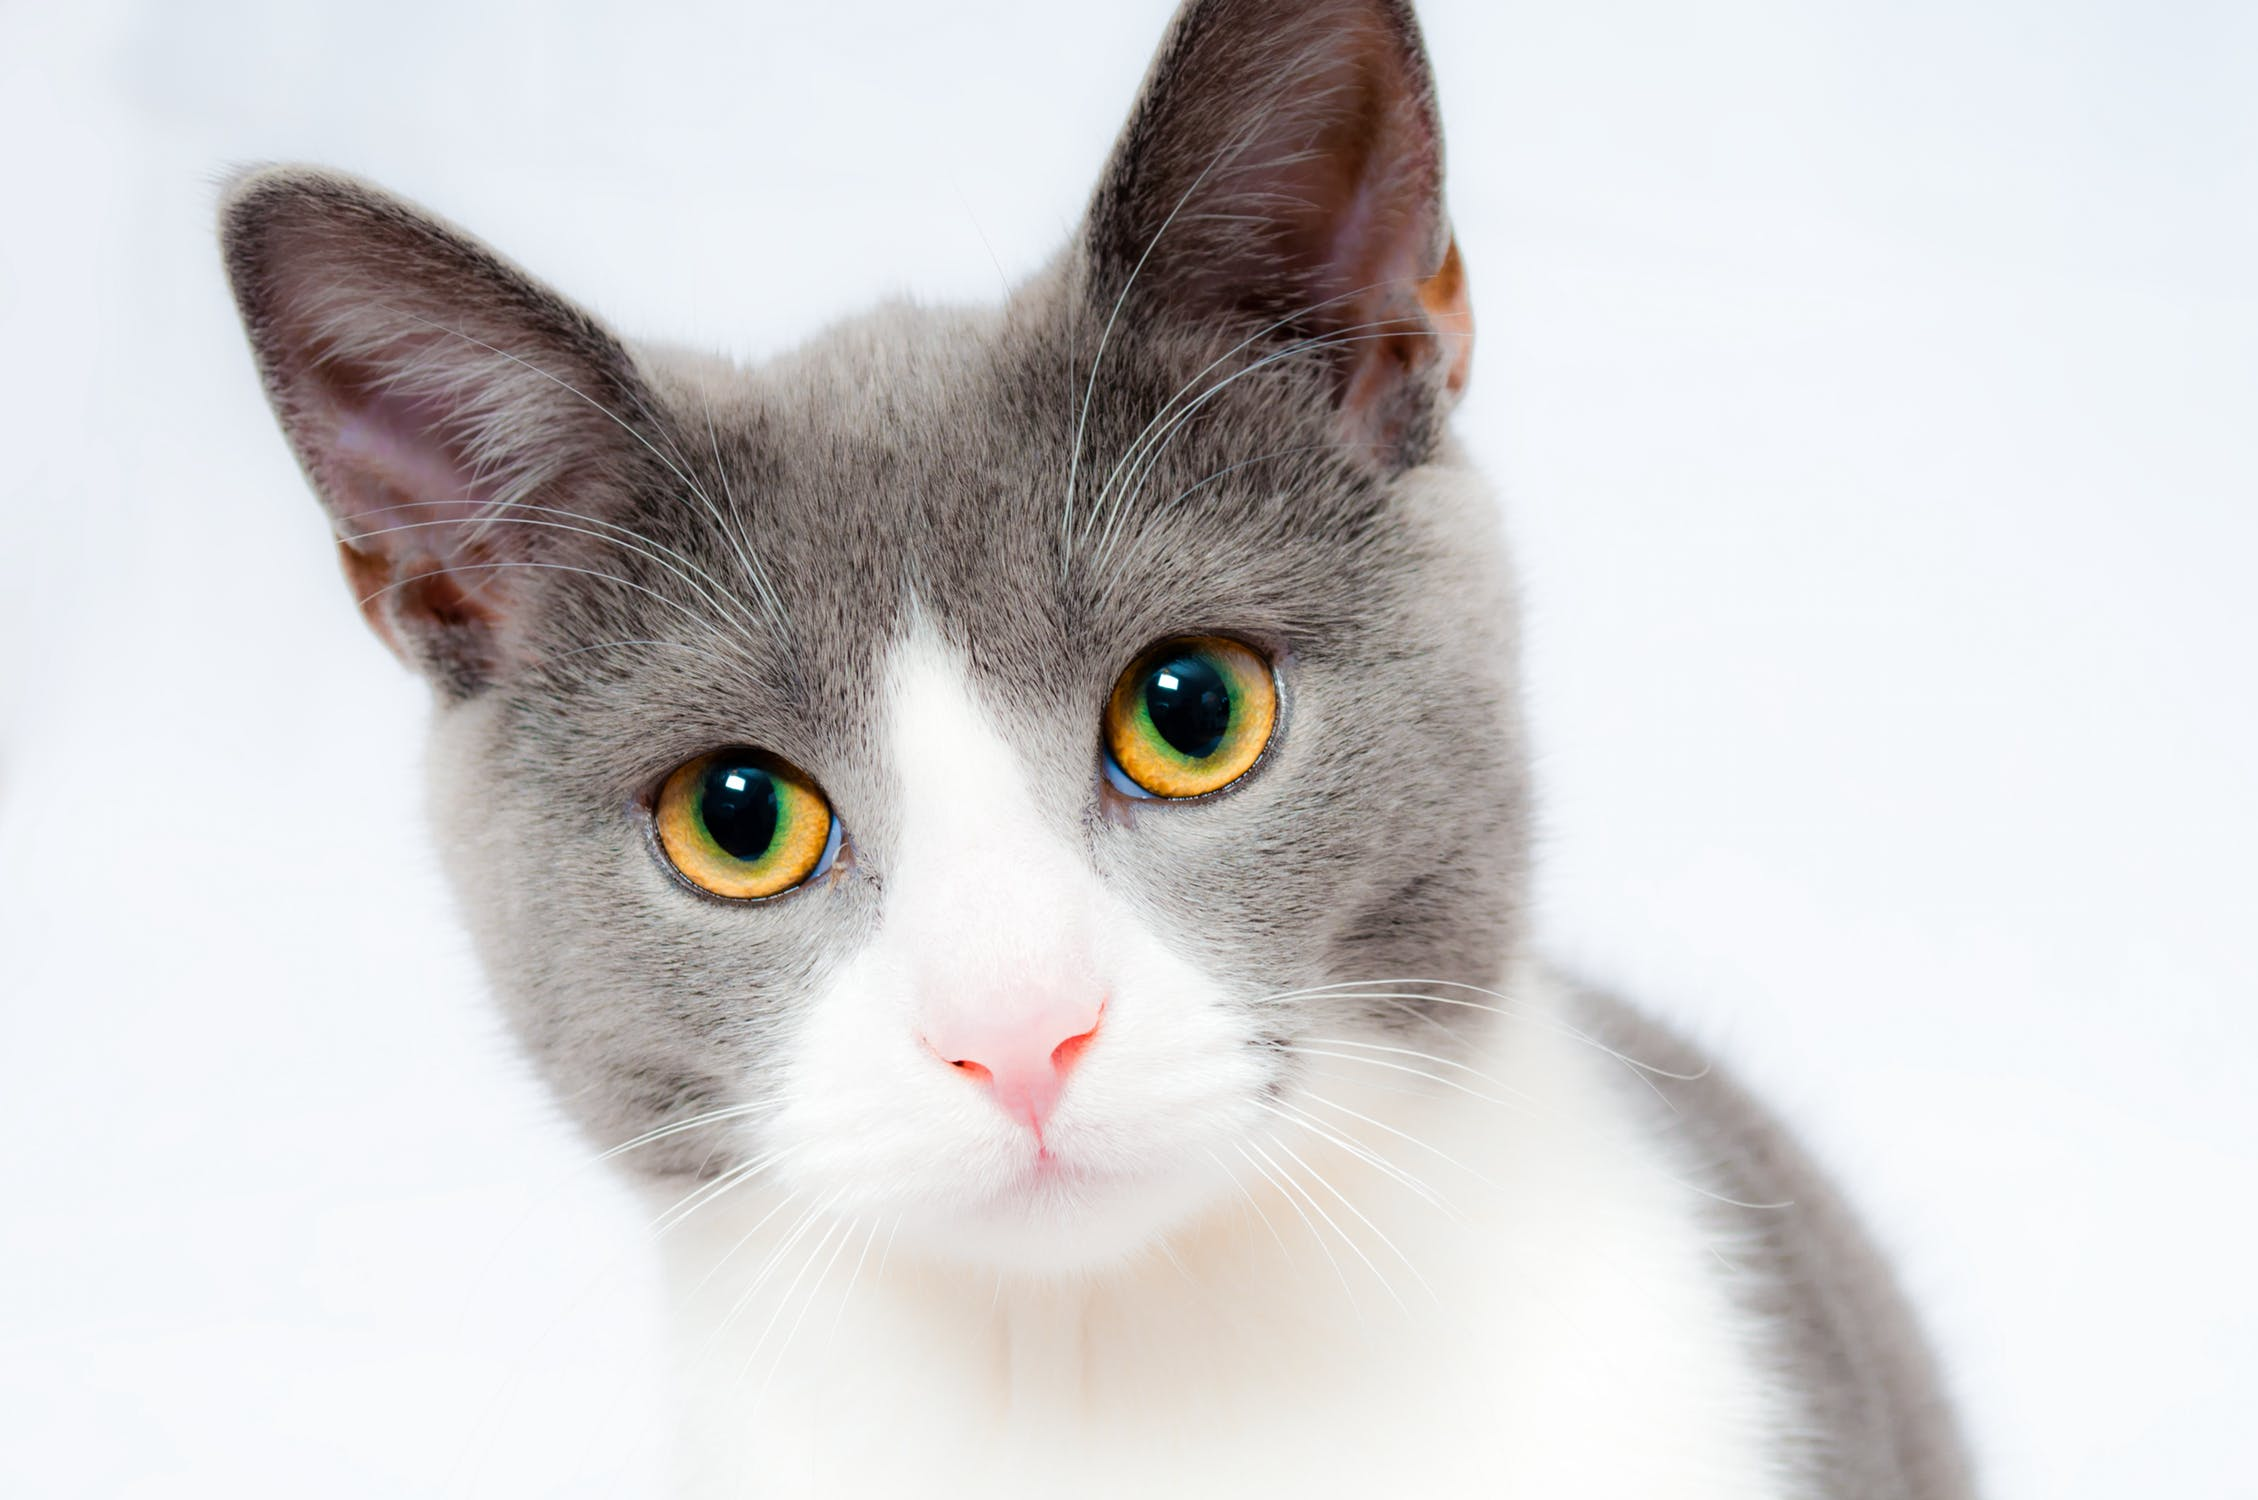

In [2]:
# 讀取圖片並顯示
from IPython.display import Image
Image('cat_02.jpg', width=200)

### 1-1. 圖片數據預處理

In [3]:
# 匯入模組
%matplotlib inline
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img # 載入img
from tensorflow.keras.preprocessing.image import img_to_array # img轉矩陣
from tensorflow.keras.applications.mobilenet import preprocess_input # 預處理

print(tf.__version__)

2.15.0


## 1-2. 載入測試圖片成為矩陣

In [4]:
# 載入測試圖片
filename = 'cat_01.jpg'
img = load_img(filename, target_size=(224, 224))
x = img_to_array(img)    # 轉換成 Numpy陣列
print('x.shape: ', x.shape)

x.shape:  (224, 224, 3)


In [5]:
# 顯示矩陣內容 dtype=float32
x[0][0] #[:10]

array([158., 136., 123.], dtype=float32)

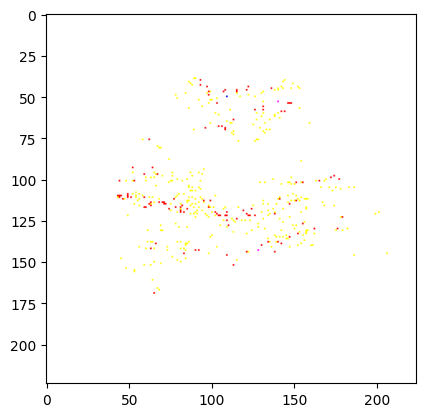

In [6]:
# 顯示224*224圖片
from matplotlib.pyplot import imshow
imshow(x)

### 🔔資料型態造成顯示不正常
### imshow with RGB data ([0..1] for floats or [0..255] for integers

## 1-3. 矩陣轉換成整數int

array([158, 136, 123], dtype=int32)

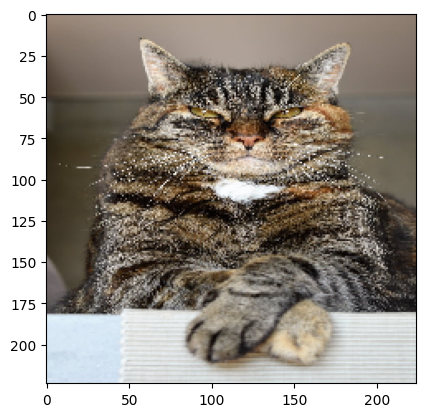

In [7]:
# 配合模型輸入尺寸
import numpy as np
x1 = np.array(x, dtype='int32')
imshow(x1)
x1[0][0] #顯示矩陣內容 dtype=int32

In [8]:
# 改變矩陣維數，三維>四維
# 配合模型 Reshape (1, 224, 224, 3)
img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
img.shape

(1, 224, 224, 3)

In [9]:
# 矩陣內容為0-255浮點數
img[0][0][0]

array([158., 136., 123.], dtype=float32)

In [10]:
# 資料預處理(標準化)
img2 = preprocess_input(img)
print('img2.shape: ', img2.shape)

img2.shape:  (1, 224, 224, 3)


In [11]:
# 矩陣內容亦改為 +/- 0~1 浮點數
img2[0][0][0][:10]

array([ 0.23921573,  0.06666672, -0.03529412], dtype=float32)

## 1-4. 練習 def自訂函數 圖片預處理功能

In [12]:
# 224x224 , 331x331
def pre_img(img_file, size):
    # 載入測試圖片
    img = load_img(img_file, target_size=(size, size))
    x = img_to_array(img)    # 轉換成 Numpy陣列
    img = x.reshape((1, x.shape[0], x.shape[1], x.shape[2]))
    imge = preprocess_input(img) #預處理
    return imge

# 2. 預備知識：使用中英翻譯

MobileNet模型1000個分類:
- https://github.com/onnx/models/blob/master/vision/classification/synset.txt
- https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

## 注意：每日有免費翻譯的額度
https://mymemory.translated.net/

In [13]:
# 安裝翻譯模組
!pip install translate

### 使程式具有翻譯功能

In [14]:
# 匯入翻譯模組
from translate import Translator

# 英翻中
E_2_TW = Translator(to_lang='zh-TW')
translation1 = E_2_TW.translate('tabby')
print (translation1)

# 中翻英
TW_2_E = Translator(from_lang='chinese', to_lang='english')
translation2 = TW_2_E.translate('老虎')
print (translation2)


tabby
old tiger


# 3. 圖片分類預測模型(一)：MobileNet
MobileNet: 準確率 0.704~0.895

## 3-1. 載入模型 (16 MB)

In [15]:
# 載入已訓練完成的模型
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import decode_predictions

In [16]:
# 建立 MobileNet 模型
model = MobileNet(weights='imagenet', include_top=True)

17225924/17225924 [==============================] - 1s 0us/step


In [17]:
# 模型摘要
print(len(model.layers))
print(len(model.weights))
print(model.count_params())
# model.summary()

91
137
4253864


## 3-2. 使用模型進行預測

In [21]:
# 指定圖片
filename = 'cat_01.jpg'
Image('cat_01.jpg',width=200)
# def 圖片預處理功能
img1 = pre_img(filename, 224)

# 使用模型進行預測
Y_pred = model.predict(img1)

# 解碼預測結果
label = decode_predictions(Y_pred)
print(label)
result = label[0][0]  # 取得最可能的結果
print('最可能判斷: %s (置信分數:%.2f%%)' % (result[1], result[2]*100))

1/1 [==============================] - 0s 95ms/step
[[('n02123045', 'tabby', 0.89599967), ('n02123159', 'tiger_cat', 0.099133156), ('n02124075', 'Egyptian_cat', 0.0016446834), ('n02127052', 'lynx', 0.00090471434), ('n03642806', 'laptop', 0.0007216445)]]
最可能判斷: tabby (置信分數:89.60%)


In [22]:
# 英翻中
E_2_TW = Translator(to_lang='zh-TW')
print(E_2_TW.translate('tabby'))
print(E_2_TW.translate('tiger_cat'))
print(E_2_TW.translate('Egyptian_cat'))
print(E_2_TW.translate('lynx'))
print(E_2_TW.translate('laptop+'))

tabby
tiger_cat
Egyptian_cat
lynx
膝上型電腦


## 3-3. 更換圖片預測

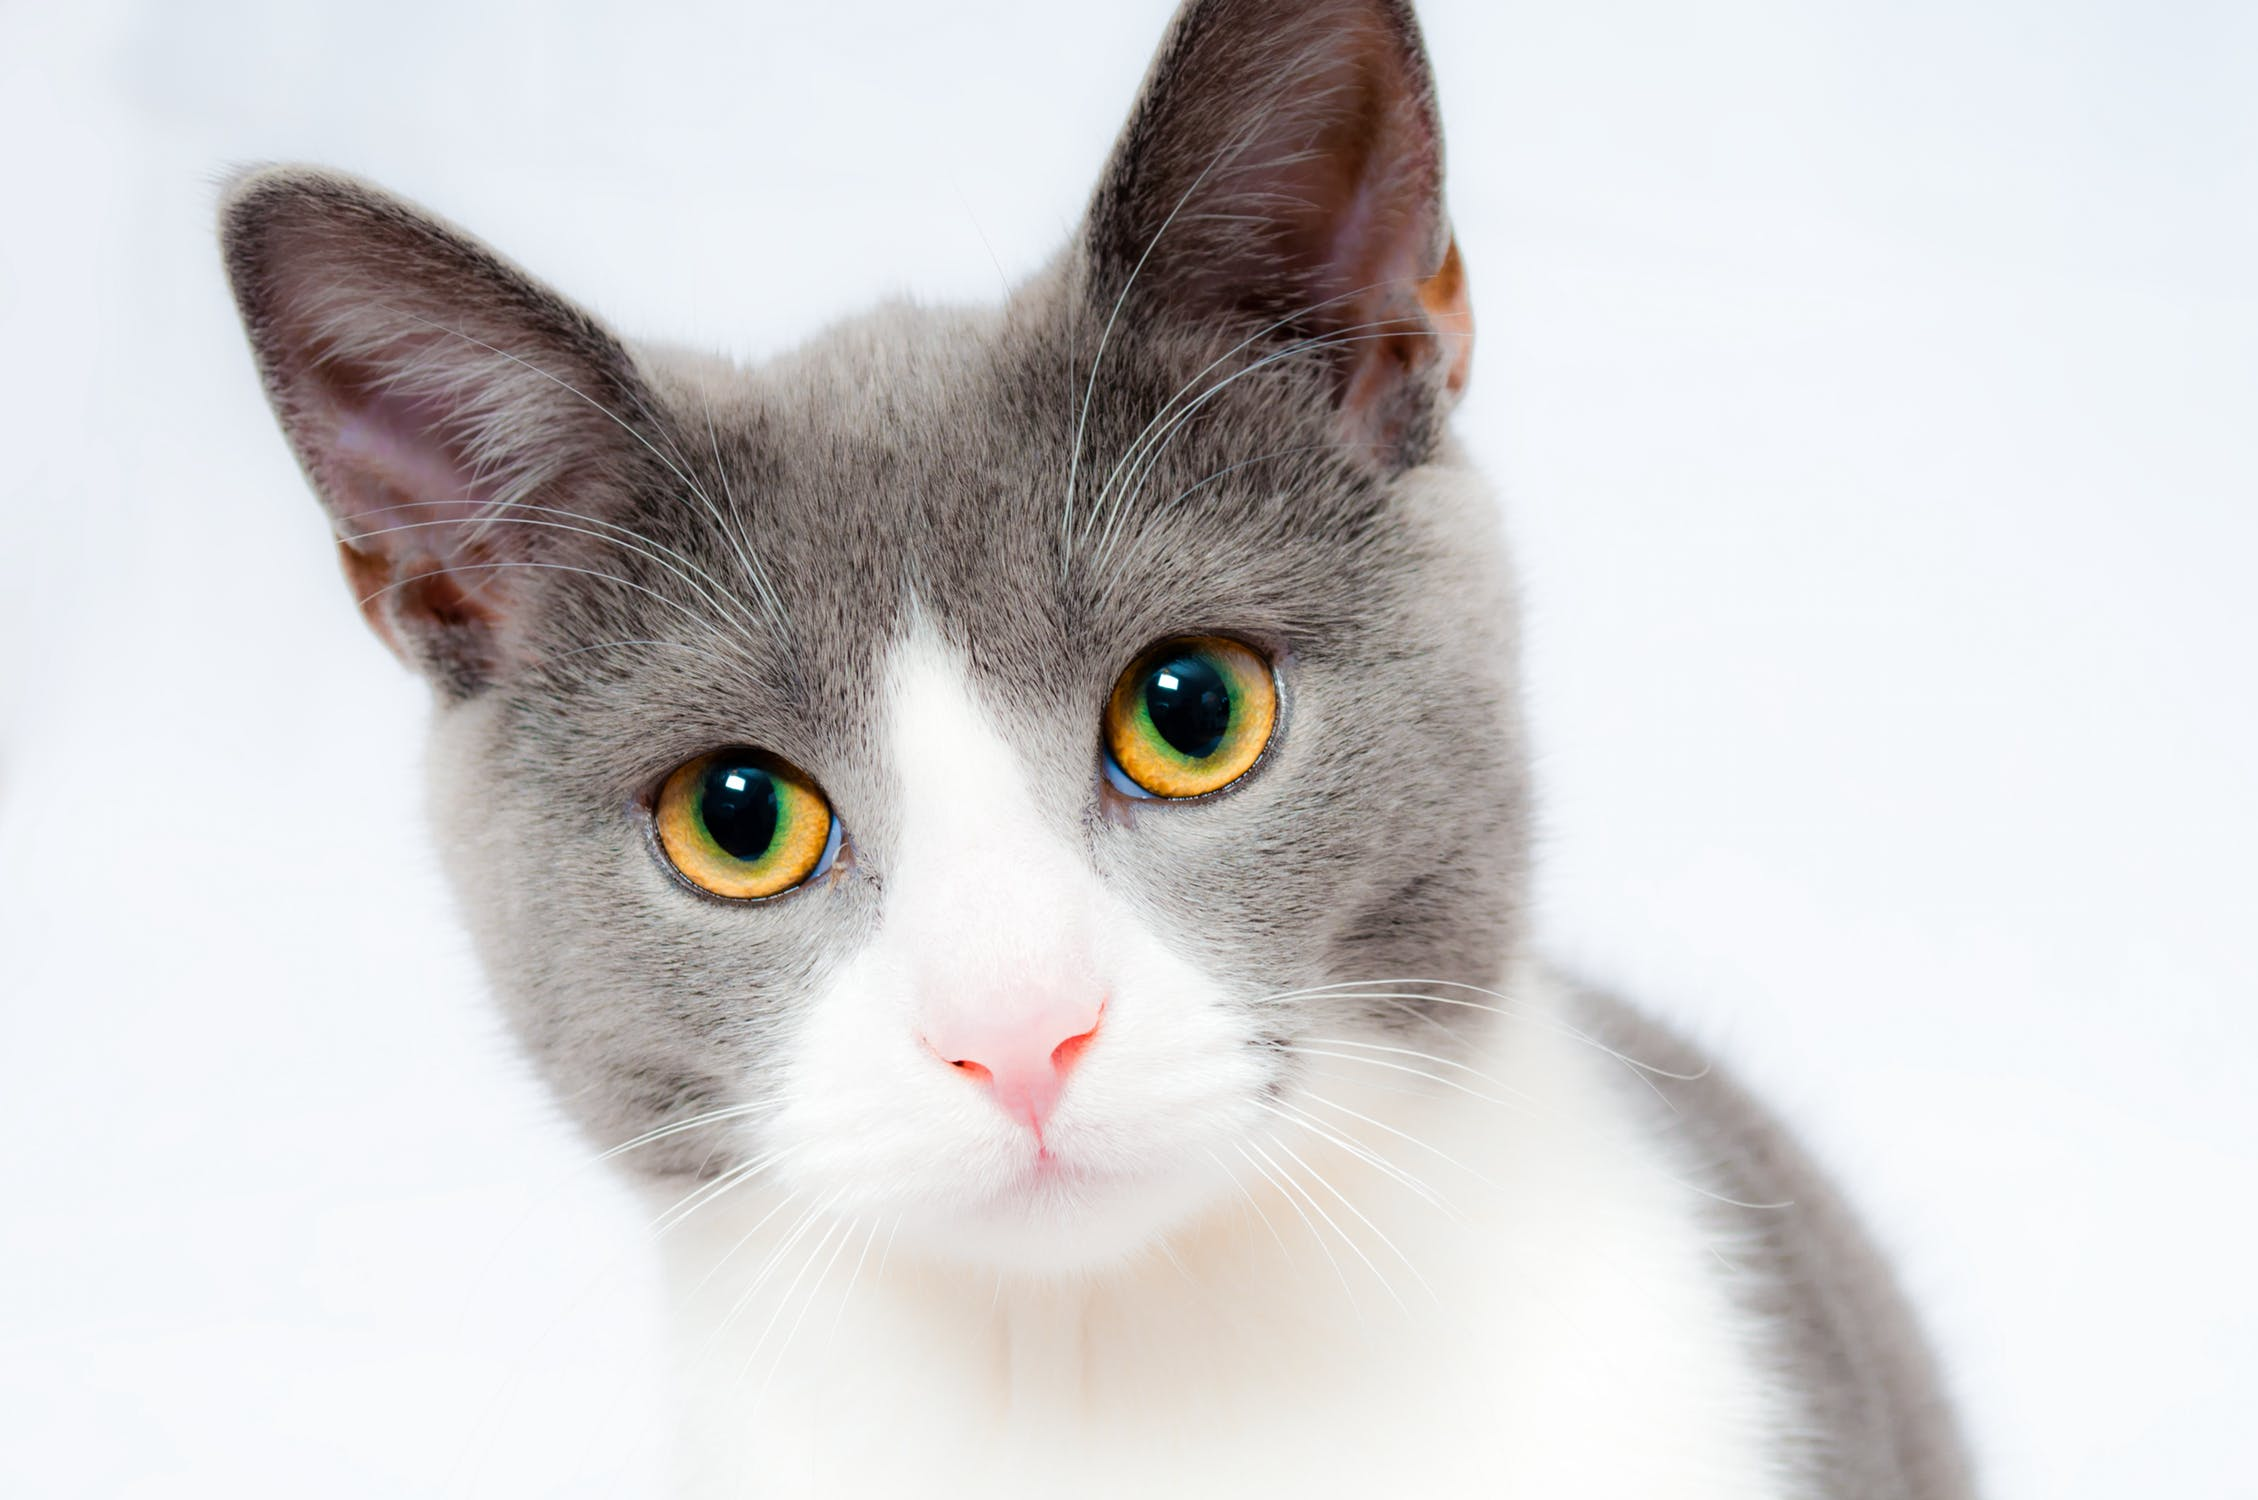

In [23]:
# 更換圖片
filename = 'cat_02.jpg'

Image(filename, width=200)

## 3-4. 執行預測

In [24]:
# def 圖片預處理功能
img2 = pre_img(filename, 224)

# 使用模型進行預測
Y_pred = model.predict(img2)

# 解碼預測結果
label = decode_predictions(Y_pred)
translator = Translator(to_lang='zh-TW')
for i in label[0]:
    text = i[1]
    print(text , '\t', E_2_TW.translate(text), '\t', i[2])
result = label[0][0]  # 取得最可能的結果
print('最可能判斷: %s (%.2f%%)' % (result[1], result[2]*100))

1/1 [==============================] - 0s 91ms/step
Egyptian_cat 	 Egyptian_cat 	 0.3840432
tiger_cat 	 tiger_cat 	 0.29049322
tabby 	 tabby 	 0.2472971
remote_control 	 遠端控制 	 0.0328303
Siamese_cat 	 暹罗猫 	 0.015357919
最可能判斷: Egyptian_cat (38.40%)


## 3-5. (練習) 載入不同圖片預測

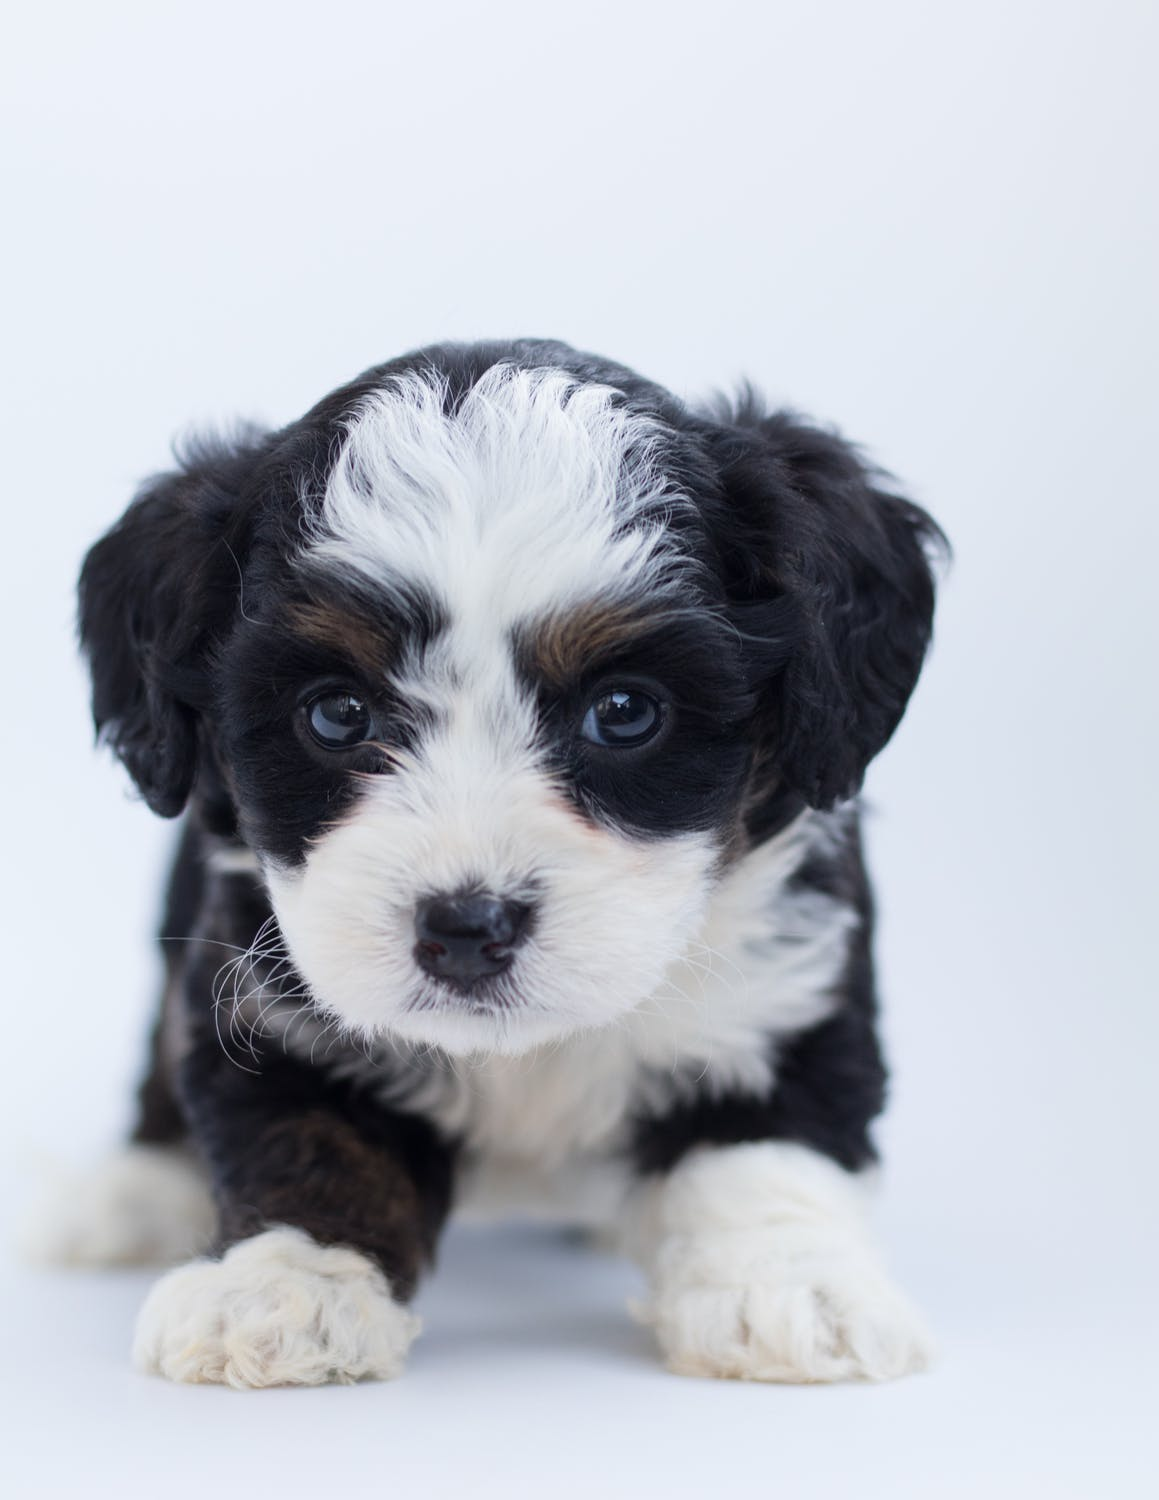

In [25]:
# 更換圖片
filename = 'dog_01.jpg'
Image(filename, width=200)

## 3-6. (練習) 執行預測

In [26]:
# def 圖片預處理功能
img_test = pre_img(filename, 224)

# 使用模型進行預測
Y_pred = model.predict(img_test)

# 解碼預測結果
label = decode_predictions(Y_pred)
E_2_TW= Translator(to_lang='zh-TW')
for i in label[0]:
    text = i[1]
    print(i[1], '\t', E_2_TW.translate(text), '\t', i[2]*100)
result = label[0][0]  # 取得最可能的結果
print('最可能判斷: %s (%.2f%%)' % (result[1], result[2]*100))

1/1 [==============================] - 0s 56ms/step
Border_collie 	 BORDER_COLLIE 	 12.304555624723434
cocker_spaniel 	 cocker_spaniel 	 10.810241103172302
Tibetan_terrier 	 Tibetan_terrier 	 10.670357942581177
miniature_schnauzer 	 miniature_schnauzer 	 9.97253730893135
Shih-Tzu 	 西施犬 	 6.686152517795563
最可能判斷: Border_collie (12.30%)


# 4. 圖片分類預測模型(二)：Keras 內建 MobileNetV2
Keras模組內建預訓練模型 (https://keras.io/zh/applications/#_3)

## 4-1. MobileNetV2

In [27]:
# 建立 MobileNetV2 模型
from tensorflow.keras.applications import MobileNetV2
model2 = MobileNetV2(weights='imagenet', include_top=True)

14536120/14536120 [==============================] - 1s 0us/step


In [28]:
# 模型摘要
print(len(model2.layers))
print(len(model2.weights))
print(model2.count_params())
# model2.summary()

156
262
3538984


## 4-2. 相同圖片使用模型 model2

In [29]:
# 使用模型進行預測
Y_predv2 = model2.predict(img_test)

# 解碼預測結果
labelv2 = decode_predictions(Y_predv2)
E_2_TW= Translator(to_lang='zh-TW')
for i in labelv2[0]:
    text2 = i[1]
    print(text2, '\t', E_2_TW.translate(text2), '\t', i[2]*100)

result2 = labelv2[0][0]  # 取得最可能的結果
print('最可能判斷: %s (%.2f%%)' % (result2[1], result2[2]*100))

1/1 [==============================] - 1s 852ms/step
Blenheim_spaniel 	 BLENHEIM_SPANIEL 	 17.268618941307068
Lhasa 	 拉薩市 	 7.420474290847778
Appenzeller 	 Appenzeller 	 6.617898494005203
Shih-Tzu 	 西施犬 	 5.0514549016952515
cocker_spaniel 	 cocker_spaniel 	 3.098129481077194
最可能判斷: Blenheim_spaniel (17.27%)


# 5. 圖片分類預測模型(三)：NASNetMobile

## 5-1. 載入模型 (24MB)

In [30]:
# 載入模型 model3
model3 = tf.keras.applications.nasnet.NASNetMobile(weights='imagenet', include_top=True)

#NASNetLarge模型預設的輸入尺寸是331x331，NASNetMobile模型預設的輸入尺寸是224x224
#keras.applications.nasnet.NASNetLarge(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
#keras.applications.nasnet.NASNetMobile(input_shape=None, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

24227760/24227760 [==============================] - 2s 0us/step


In [31]:
# 模型摘要
print(len(model3.layers))
print(len(model3.weights))
print(model3.count_params())
# model3.summary()

771
1126
5326716


## 5-2. 相同圖片使用模型 model3

In [32]:
# 使用模型進行預測
Y_pred3 = model3.predict(img_test)

# 解碼預測結果
label3 = decode_predictions(Y_pred3)
E_2_TW = Translator(to_lang='zh-TW')
for i in label3[0]:
    text3 = i[1]
    print(text3, '\t', E_2_TW.translate(text3), '\t', i[2]*100)

result2 = labelv2[0][0]  # 取得最可能的結果
print('最可能判斷: %s (%.2f%%)' % (result2[1], result2[2]*100))

1/1 [==============================] - 4s 4s/step
Shih-Tzu 	 西施犬 	 14.068470895290375
Japanese_spaniel 	 Japanese_spaniel 	 10.432817786931992
papillon 	 乳突 	 6.902593374252319
Border_collie 	 BORDER_COLLIE 	 6.191446632146835
Blenheim_spaniel 	 BLENHEIM_SPANIEL 	 6.125567480921745
最可能判斷: Blenheim_spaniel (17.27%)


# 6. 比較
- 使用模型辨識更多圖片，例如：鳥類, 交通工具
- 比較三種模型測的結果


### 教學圖片來源(免費圖庫):
- https://www.pexels.com/zh-tw/search/cat/
- https://www.pexels.com/zh-tw/search/bird/

In [38]:
#上傳圖片方法複習
from google.colab import files
uploaded = files.upload()

Saving canguzo.jpg to canguzo.jpg


In [34]:
# 檢查檔案
!pwd
!ls

/content/drive/MyDrive/class_AI/model_images
1_mobilenet_predict.ipynb  car_02.jpg  dog_01.jpg
bird_01.jpg		   cat_01.jpg  set-colorful-hatchback-car-vectors_53876-67377.jpg
bird_02.jpg		   cat_02.jpg  snake_01.jpg
car_01.jpg		   cat_03.jpg


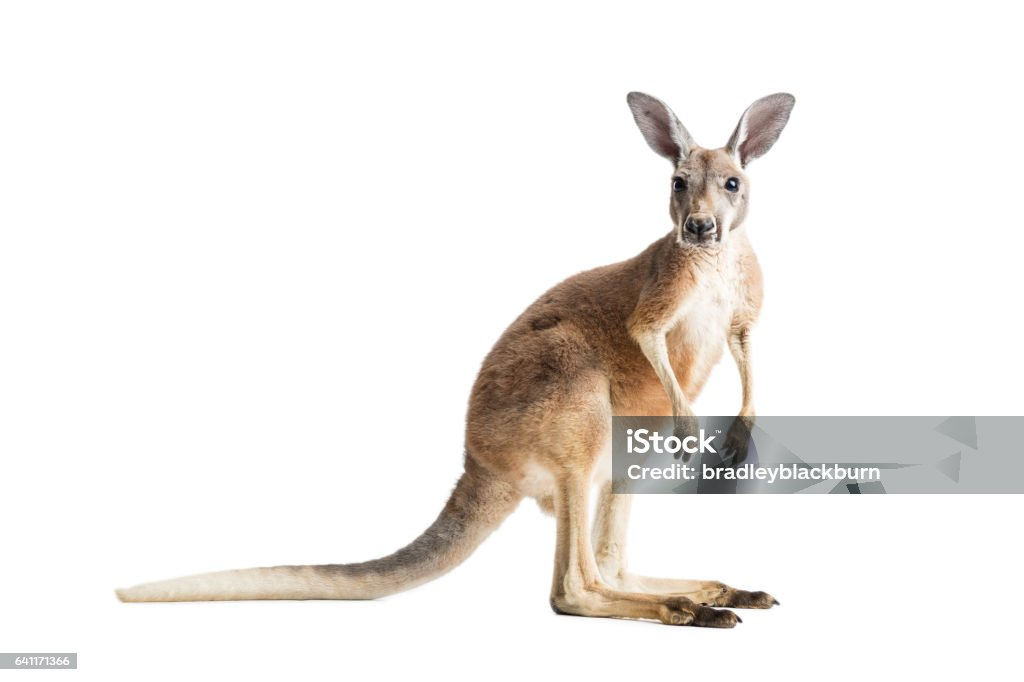

In [39]:
# 更換圖片
file_img_test = 'canguzo.jpg'
Image(file_img_test, width=200)

In [40]:
# def 圖片預處理功能
img_test = pre_img(file_img_test, 224)

In [41]:
# 使用模型進行預測
Y_pred1 = model.predict(img_test)
Y_pred2 = model2.predict(img_test)
Y_pred3 = model3.predict(img_test)

# 預測結果
label1 = decode_predictions(Y_pred1)
label2 = decode_predictions(Y_pred2)
label3 = decode_predictions(Y_pred3)
print('模型1:', label1)
print('模型2:', label2)
print('模型3:', label3)

result1 = label1[0][0]  # 取得最可能的結果
result2 = label2[0][0]  # 取得最可能的結果
result3 = label3[0][0]  # 取得最可能的結果
print('最可能判斷(模型1): %s (置信分數:%.2f%%)' % (result1[1], result1[2]*100))
print('最可能判斷(模型2): %s (置信分數:%.2f%%)' % (result2[1], result2[2]*100))
print('最可能判斷(模型3): %s (置信分數:%.2f%%)' % (result3[1], result3[2]*100))
#
print(E_2_TW.translate(label1[0][0][1]), label1[0][0][2])
print(E_2_TW.translate(label2[0][0][1]), label2[0][0][2])
print(E_2_TW.translate(label3[0][0][1]), label3[0][0][2])

1/1 [==============================] - 0s 216ms/step
模型1: [[('n02326432', 'hare', 0.6158925), ('n01877812', 'wallaby', 0.36133224), ('n02119022', 'red_fox', 0.0097437985), ('n02120505', 'grey_fox', 0.0021382864), ('n02119789', 'kit_fox', 0.0016874956)]]
模型2: [[('n01877812', 'wallaby', 0.7989067), ('n02326432', 'hare', 0.05095012), ('n02106662', 'German_shepherd', 0.048139267), ('n02114855', 'coyote', 0.010631958), ('n02114712', 'red_wolf', 0.0086776465)]]
模型3: [[('n01877812', 'wallaby', 0.8847143), ('n02326432', 'hare', 0.020524018), ('n02423022', 'gazelle', 0.0050805956), ('n02437616', 'llama', 0.0035923054), ('n02056570', 'king_penguin', 0.0026297786)]]
最可能判斷(模型1): hare (置信分數:61.59%)
最可能判斷(模型2): wallaby (置信分數:79.89%)
最可能判斷(模型3): wallaby (置信分數:88.47%)
野兔 0.6158925
小袋鼠 0.7989067
小袋鼠 0.8847143
